# Stochastic Gradient Descent example

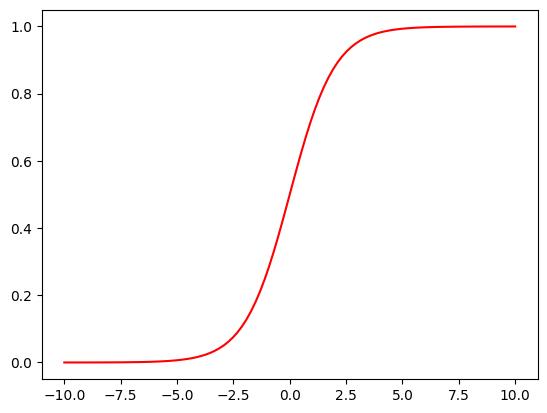

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
#
X1 = np.array([0.27, 0.09, 0.00, 0.23, 0., 1.00, 0.32]);
#
#
x = np.linspace(-10,10,100);
# function to compute the sigmoid
sigmoid = lambda x: 1/(1 + np.exp(-x));

pl.plot(x,sigmoid(x),'r') # plot the line



In [2]:
################################################################################
# This function implements the SGD algorithm for a simple layer net 
# with 3 inputs and one output
#  W - the weight matrix
#  X - the input data
#  D - correct output of the training data.
#  (0,0,1, 0)
#  (0,1,1, 0)
#  (1,0,1, 1)
#  (1,1,1, 1)
################################################################################
#
def SGD(W, X, D):
    alpha = 0.9 # learning rate
    N=4
    for k in range(0,N):
        x = X[k, :].T; #inputs from training data
        #print("x=",x)
        d = D[k]; # correct output from training data
        
        # calculate the weighted sum
        v = np.dot(W,x);
        #pass the weighted sum to the activation function, this gives the output
        y = sigmoid(v);
        #calculate the error, difference between correct output and computed output
        e = d - y;
        #calculate delta, derivative of the activation function times the error
        # note that 𝜎′(𝑥)=𝜎(𝑥)∙(1− 𝜎(𝑥)) = y * (1-y)
        delta = y*(1-y)*e; # element wise multiplication
        # Adjust the weights according to the learning rule
        #apply generalized delta rule
        x.shape=(1,3) # row vector of the current input        
        dW = alpha*np.dot(delta,x);
        W = W + dW;
        #
    return W;
    
    

In [3]:
#
#################################
# Testing backprop with XOR data
#################################
# inputs array
X = np.array(
    [ [0, 0, 1],
      [0, 1, 1],
      [1, 0, 1],
      [1, 1, 1] 
    ]);
#print(X)
# correct output column vector
D = np.array(
            [ 
                [0], 
                [0], 
                [1], 
                [1]
            ]);
#print(D)
# initialize the weights between input layer and output
W = 2*np.random.rand(1, 3) - 1;

#
# run the SGD algorithm to compute the weights
for epoch in range(1,10000): # train
    W = SGD(W, X, D);
#
#
# calculate the output of the network with computed weights 
N=4
for k in range(0,N):
    x = X[k, :].T; #inputs from training data
    #
    # calculate the weighted sum of input nodes
    v = np.dot(W,x);
    #pass the weighted sum to the activation function, this gives the outputs
    y = sigmoid(v);  
    print("y=",y)
    
    

y= [0.01020283]
y= [0.00829279]
y= [0.99324382]
y= [0.99168473]
